# 量化投资策略评估与归因分析


## 1. 交易策略收益与风险评估

量化投资策略设计最后一步就是回测，在交易策略，投资策略或风险建模中，回测旨在估计策略或模型在过去一段时间内的表现。

回测是一种反向测试，应用于前一时间段的特殊类型的交叉验证；回溯测试提供了在合成数据上测试模型和策略时无法获得的信息，同时可以进一步对策略参数进行优化。

(pic)

### 1.1 策略评价标准

#### 1.1.1 基准指数

在大部份情况下，投资者会选择一项市场指数或结合多项指数，作为投资组合的基准指数。指数可追踪整体资产类别的表现，例如所有上市股票；或局部市场范畴的表现，例如科技股。由于指数以「买入后持有」的基础追踪回报，而且不会试图判断哪些证券最具吸引力，因此指数代表了被动型投资方式，并可用作比较主动型管理投资组合表现的基准。我们可透过指数得知主动型经理为投资组合增值的幅度，以及有关价值的贡献来源。

| 指数             | 市场       | 描述                                                              |
|------------------|------------|-------------------------------------------------------------------|
| 道琼斯工业平均指数 | 美国       | 涵盖30支在美国上市的“蓝筹”股的价格加权平均指数                   |
| 富时100指数        | 英国       | 涵盖在伦敦证券交易所上市的100家最大英国公司的市值加权指数         |
| 恒生指数          | 香港       | 按公司流通量调整市值的指数，涵盖在香港联合交易所上市的50家最大公司 |
| MSCI世界指数      | 环球股票   | 按公司流通量调整市值的指数，涵盖23项已发展市场国家指数             |
| 纳斯达克综合指数   | 美国       | 涵盖约3,000支在纳斯达克股票交易所上市的普通股市值加权指数          |
| 日经225指数        | 日本       | 以日圆计算值的价格加权股票指数，涵盖在东京证券交易所上市的225家最大型公司 |
| 标准普尔500指数    | 美国       | 涵盖500支美国大型股表现的市值加权指数                            |
| 沪深300指数        | 中国       | 涵盖沪深两地上市的300家市值最大的A股公司，反映中国股市整体表现     |


#### 1.1.2 回报的连续性

回报的连续性描述了一个策略产生连续正回报或负回报的能力，通常用于衡量策略在一定时期内的稳定性与可靠性。

回报的连续性可以通过统计学中的**自相关性**来评估，特别是计算回报序列在不同时间滞后的自相关系数。例如，给定每日回报率序列 $ r_t $ ，我们可以计算出不同滞后时间 $ \tau $ 的自相关系数 $ \rho(\tau) $：

$$
\rho(\tau) = \frac{\text{Cov}(r_t, r_{t-\tau})}{\sigma_{r_t} \sigma_{r_{t-\tau}}}
$$

其中，$ \text{Cov}(r_t, r_{t-\tau}) $ 表示回报在时间 $ t $ 和 $ t-\tau $ 之间的协方差，而 $ \sigma_{r_t} $ 和 $ \sigma_{r_{t-\tau}} $ 分别是对应时间段的标准差。

高正自相关性表明该策略在时间上具有较高的回报连续性，即连续获得正回报的可能性较高；而负自相关性则表明该策略的回报波动较大，可能出现连续亏损或回报大起大落的情况。

回报连续性的衡量方法包括

- 连续正回报天数：统计策略连续获得正回报的最长天数或平均天数，通常用于判断策略是否稳定地为投资者带来正收益。

- 回撤与恢复速度：连续性好的策略在发生回撤后，能够更快地恢复至历史最高点。因此，可以通过观察回撤后的恢复时间来评价策略的回报连续性。


#### 1.1.3 夏普比率

夏普比率（Sharpe Ratio）是衡量投资回报与风险之间关系的常用指标，用于评估一个投资组合或策略是否能在考虑风险的情况下提供较高的收益。它是由诺贝尔经济学奖得主威廉·夏普（William F. Sharpe）提出的，主要用于比较不同投资策略或资产在相同风险水平下的表现。它也是回报连续性的衡量方法之一。

夏普比率的公式如下：

$$
S = \frac{R_p - R_f}{\sigma_p}
$$

其中 $ R_p $为投资组合或策略的期望回报率，$ R_f $为无风险利率（通常使用国债利率等作为无风险资产的收益率），$ \sigma_p $为投资组合或策略回报的标准差（即回报的波动性，代表投资的风险）

从公式中可以看到，夏普比率的含义可以理解为：**每承受一单位风险，投资者能获得多少单位的超额回报**。夏普比率越高，意味着该投资组合在承担相同风险的情况下，能带来更高的回报，表现更优。

**夏普比率的解释**

- $ S > 1 $：投资组合表现良好，说明每单位风险带来了较高的超额回报
- $ 0 < S < 1 $：投资组合表现一般，回报相对于风险并不显著
- $ S = 0 $：投资组合的回报等于无风险利率，没有任何额外的收益
- $ S < 0 $：投资组合表现较差，承受的风险反而带来了负的超额回报，表明该策略并不成功

**夏普比率的变种**

1. 调整后的夏普比率（Adjusted Sharpe Ratio）
   针对非正态分布的回报率，夏普比率进行了调整，考虑了回报分布的**偏度**（skewness）和**峰度**（kurtosis），公式如下：

   $$
   \text{Adjusted Sharpe Ratio} = S \left[ 1 + \frac{S}{6} \left( \text{Skewness} - \frac{\text{Kurtosis} - 3}{4} \right) \right]
   $$

   其中偏度衡量回报分布的不对称性， 峰度衡量回报分布的尖峰程度。

2. 索提诺比率（Sortino Ratio）
   索提诺比率与夏普比率类似，但它只考虑下行风险（即负回报的风险），表示每承担一单位的下行风险，将会获得多少超额回报。公式为：

   $$
   \text{Sortino Ratio} = \frac{R_p - R_f}{\sigma_{\text{down}}}
   $$

   其中，$ \sigma_{\text{down}} $ 是投资组合的下行风险标准差。

为计算 $\sigma_{\text{down}}$，我们首先要设定一个“目标回报率” $ T $，这个门槛通常是无风险利率 $ R_f $ 或 0。例如，在计算索提诺比率时，目标回报率通常被设定为无风险利率。对于每一个回报率 $ r_t $，如果 $ r_t $ 低于目标回报率 $ T $，则该差值 $ T - r_t $ 会被视为下行偏差，否则视为零，即

$$
D_t = \max(T - r_t, 0)
$$

接着，将所有下行偏差平方后取平均，再开平方根，得到下行风险标准差。具体计算公式如下：

$$
\sigma_{\text{downside}} = \sqrt{\frac{1}{n} \sum_{t=1}^{n} \max(T - r_t, 0)^2}
$$

其中 $ n $ 是回报序列的长度（即总样本数）， $ r_t $ 是第 $ t $ 个时间点的回报率， $ T $ 是目标回报率（无风险利率或零回报率）。


**夏普比率的局限性**

虽然夏普比率在风险调整后回报的评估中非常有用，但它也有一些局限性：

1. 假设回报是正态分布，即回报是对称的，而实际上金融市场中的回报常常是非正态分布的，有可能存在尖峰厚尾现象
   
2. 未考虑不同的风险类别，而是将所有风险归结为回报的波动性，但并未区分不同类型的风险（如市场风险、信用风险、流动性风险等）

3. 短期策略的误导性。一些高频交易策略可能在短期内表现出极高的夏普比率，但并不能保证其在长期中有稳定的表现。

**例子**

假设某投资组合的年化回报率 $ R_p = 15\% $，无风险利率 $ R_f = 2\% $，该组合的年化波动率 $ \sigma_p = 10\% $。其夏普比率可以计算为：

$$
S = \frac{15\% - 2\%}{10\%} = 1.3
$$

下面给出 Sharpe ratio 和 Sortino ratio 的计算代码示例。首先加载本文档中将要用到的库。（若有缺失库，可用 `!pip install 库名` 命令安装）

In [1]:
import numpy as np
import pandas as pd
import akshare as ak
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签

In [46]:
returns = np.array([0.05, 0.02, -0.03, 0.01, -0.01])

# 每日无风险利率
risk_free_rate = 0.02 / 252

# 夏普率
def sharpe_ratio(returns, risk_free_rate=0.0):
    excess_returns = returns - risk_free_rate
    return np.mean(excess_returns) / np.std(excess_returns, ddof=1)

# 索提诺比率
def sortino_ratio(returns, target_return=0.0, risk_free_rate=0.0):
    excess_returns = returns - risk_free_rate
    downside_risk = np.sqrt(np.mean(np.where(excess_returns < target_return, (excess_returns - target_return) ** 2, 0)))
    return np.mean(excess_returns) / downside_risk

sharpe = sharpe_ratio(returns, risk_free_rate)
sortino = sortino_ratio(returns, target_return=0.0, risk_free_rate=risk_free_rate)

print(f"夏普比率: {sharpe:.4f}")
print(f"索提诺比率: {sortino:.4f}")

夏普比率: 0.2611
索提诺比率: 0.5583


#### 1.1.4 最大回撤

最大回撤（Maximum Drawdown, MDD）是用于衡量投资组合或策略在某段时间内，从最高点到最低点的最大跌幅。它通常被用来评估投资的下行风险，即投资组合在最坏情况下可能会经历多大的损失。

![MDD](img/MDD.png)

如上图，最大回撤发生在A到B的下跌阶段，其中A点为波峰，B点为波谷。最大回撤的计算公式为

$$
MDD = \frac{P_A-P_B}{P_A}\times 100\%
$$

根据获得的数据不同，实践中我们有至少两种方法计算最大回撤

**已知价格序列**

假设股票价格序列为 $[100, 120, 90, 130, 80, 100]$

In [3]:
def MDD_1(price_series):
    peak = 0
    max_dd = 0  # 最大回撤

    for price in price_series:
        if price > peak:
            peak = price
        dd = (peak - price) / peak
        if dd > max_dd:
            max_dd = dd

    return max_dd

In [4]:
price_series = [100, 120, 90, 130, 80, 100]
mdd_1 = MDD_1(price_series)
print(f'最大回撤：{mdd_1:.4f}')

最大回撤：0.3846


**已知收益率序列**

我们可以将以上价格转化为收益率序列。接着我们写出第二种计算最大回撤的方法，利用NumPy的向量化编程实现更简洁快速的计算方式。

In [5]:
def price2ret(price):
    return (np.array(price[1:]) / np.array(price[:-1])) - 1

def MDD_2(ret_series):
    cum_ret = (1 + ret_series).cumprod()
    peak = np.maximum.accumulate(cum_ret)
    drawdown = (peak - cum_ret) / peak

    return np.max(drawdown)

In [6]:
ret_series = price2ret(price_series)
mdd_2 = MDD_2(ret_series)
print(f'最大回撤：{mdd_2:.4f}')

最大回撤：0.3846


通过下面的玩具代码可以更直观地理解最大回撤概念。向函数中输入不同整数以生成不同随机种子，可以得到形状不同地累积收益率曲线，并观察其最大回撤发生地位置。

In [7]:
def playMDD(seed):
    np.random.seed(seed)
    returns = np.random.normal(0.0005, 0.01, 252)
    cumulative_returns = (1 + returns).cumprod()
    peak = np.maximum.accumulate(cumulative_returns)  # 计算历史最大值
    drawdown = (cumulative_returns - peak) / peak    # 计算回撤
    max_drawdown_index = np.argmin(drawdown)         # 最大回撤对应的谷底
    max_drawdown_peak_index = np.argmax(cumulative_returns[:max_drawdown_index])  # 波峰（在谷底之前的最大值）

    # 绘制收益率曲线
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_returns, label='Cumulative Returns')
    plt.scatter(max_drawdown_peak_index, cumulative_returns[max_drawdown_peak_index], color='red', label='Peak (Max Drawdown)', zorder=5)
    plt.scatter(max_drawdown_index, cumulative_returns[max_drawdown_index], color='green', label='Trough (Max Drawdown)', zorder=5)
    plt.text(max_drawdown_peak_index-3, cumulative_returns[max_drawdown_peak_index], 'A', color='red', fontsize=14, ha='right')
    plt.text(max_drawdown_index-3, cumulative_returns[max_drawdown_index], 'B', color='green', fontsize=14, ha='right')

    plt.title("随机生成的累积收益率曲线及最大回撤")
    plt.xlabel("交易日")
    plt.ylabel("累积收益率")
    plt.legend()
    plt.grid(True)
    plt.show()

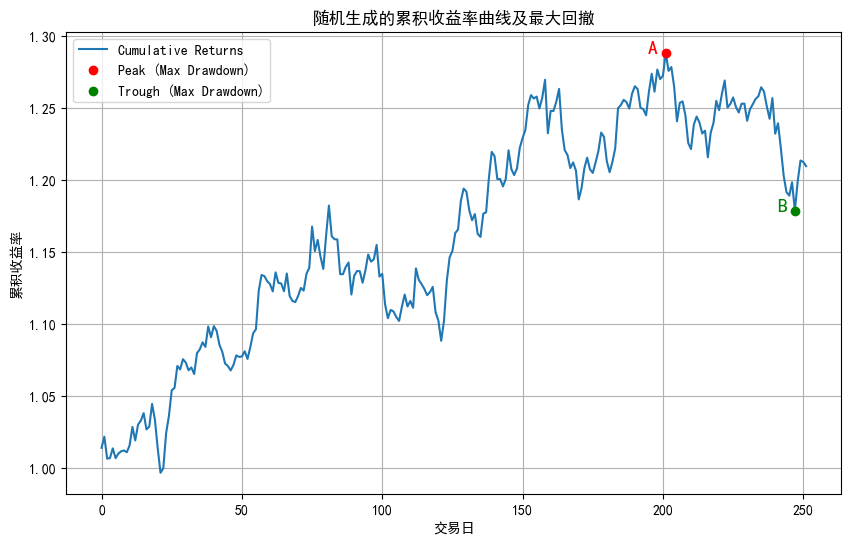

In [8]:
playMDD(10)

#### 1.1.5 Beta

Beta表示投资的系统性风险，反映了策略对大盘变化的敏感性。例如一个策略的Beta为1.5，则大盘涨1%时，策略可能涨1.5%，反之亦然；如果一个策略的Beta为-1.5，说明大盘涨1%的时候，策略可能跌1.5%，反之亦然。计算公式如下

$$
\beta_p = \frac{cov(R_p, R_m)}{Var(R_m)}
$$

其中 $R_p$ 为策略的每日收益，$R_m$ 为基准组合的每日收益，$cov(R_p, R_m)$ 为两者协方差，$Var(R_m)$ 为基准收益的方差。

假如组合中只有一只股票，我们可以求出个股的 $\beta$ 值。用玩具数据总有些无趣，所以我们以贵州茅台（600519.SH）的真实数据为例计算。首先观察股价走势。

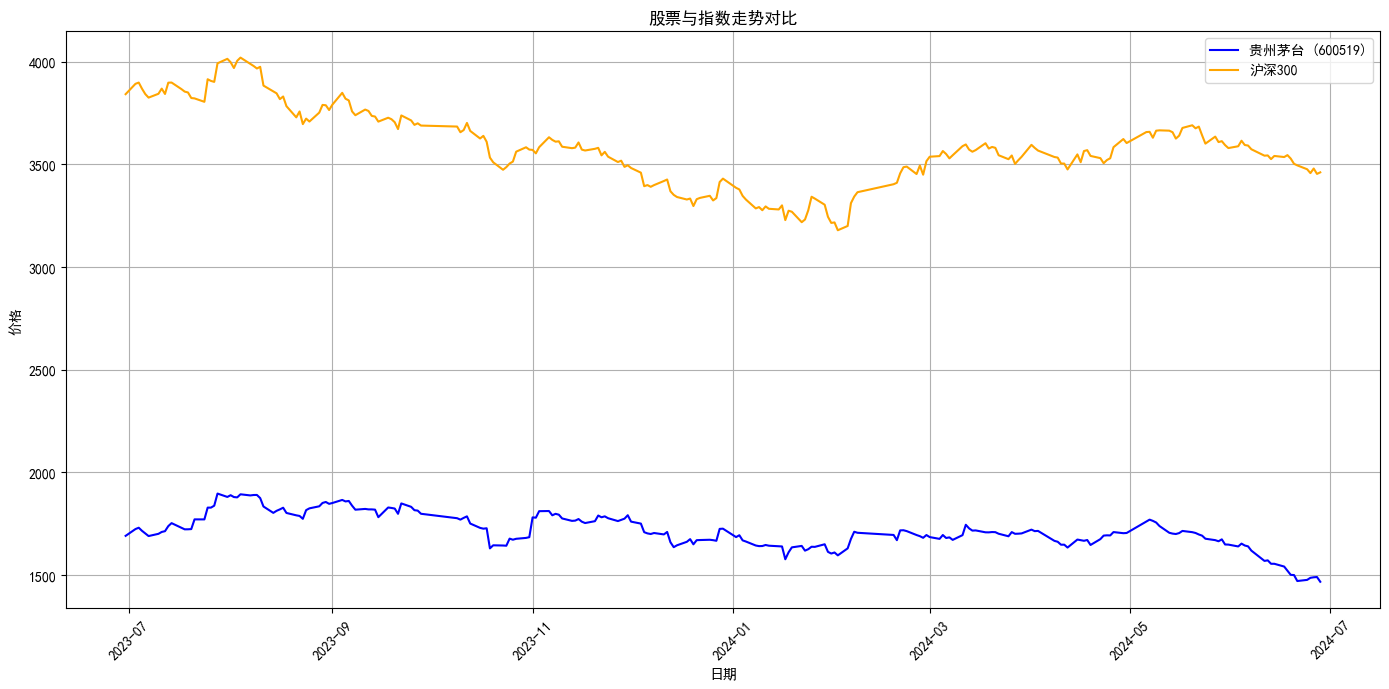

In [9]:
stock_data = ak.stock_zh_a_hist(symbol="600519", start_date="20230630", end_date="20240630")
asset_price = stock_data["收盘"]
market_data = ak.stock_zh_index_daily(symbol="sh000300")
market_data = market_data[market_data["date"].between(dt.date(2023, 6, 30), dt.date(2024, 6, 30))]
benchmark_price = market_data["close"]

plt.figure(figsize=(14, 7))
plt.plot(stock_data["日期"], asset_price, label="贵州茅台 (600519)", color='blue')
plt.plot(market_data["date"], benchmark_price, label="沪深300", color='orange')
plt.title("股票与指数走势对比")
plt.xlabel("日期")
plt.ylabel("价格")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

可以观察到两者呈现比较明显的相关性，且贵州茅台的走势较沪深300更加平稳，因此推测 $\beta<1$

In [10]:
def beta(asset_price, benchmark_price):
    return np.cov(asset_price, benchmark_price)[0][1] / np.var(benchmark_price)

b = beta(asset_price, benchmark_price)
print(f"beta: {b:.2f}")

beta: 0.32


因此，由2023.6.30至2024.6.30数据计算的贵州茅台 $\beta=0.32$。可以尝试调整时间跨度，看看对Beta值有什么影响。

#### 1.1.6 Alpha

$\alpha$值用于衡量投资组合相对于基准组合的超额收益，其计算公式如下

$$
\alpha = R_i-(R_f+\beta (R_m-R_f))
$$

其中

- $R_i$：投资组合年化收益率
- $R_f$：无风险收益率
- $R_m$：基准年化收益率
- $\beta$：策略beta值

首先我们需要对一段收益率序列做**年化处理**。假设日频收益率序列为 $R_1, R_2, \cdots, R_n$，则区间收益为 

$$
1+R=\prod_{i=1}^{n}(1+R_i)
$$

年化收益率为

$$
R_a=\left(1+R\right)^{\frac{252}{n}}-1
$$

In [33]:
def annualized_return(ret_series):
    ret_series = np.array(ret_series)
    cum_ret = (1 + ret_series).cumprod().tolist()[-1]
    r_a = cum_ret ** (252 / len(ret_series)) - 1
    return r_a

仍然以刚才投资组合内仅有一只股票（贵州茅台）为例，我们来看看这只股票的 $\alpha$ 如何计算。

In [34]:
asset_ret = asset_price.pct_change().dropna().tolist()
benchmark_ret = benchmark_price.pct_change().dropna().tolist()
annul_asset_ret = annualized_return(asset_ret)
annul_benchmark_ret = annualized_return(benchmark_ret)
print(f"组合年化收益率: {annul_asset_ret:.2%}，基准年化收益率: {annul_benchmark_ret:.2%}")

组合年化收益率: -13.78%，基准年化收益率: -10.34%


由 $R_i=-13.78\%, R_m=-10.34\%$，假设无风险利率 $R_f=2\%$，则

$$
\alpha = -13.78\% - (2\% + 0.32\times (-10.34\% - 2\%)) = -11.83\%
$$

#### 1.1.7 波动率

波动率反映了策略每日收益率的波动程度。通过对每日收益率的标准差进行年化处理，可以将不同时间周期内的收益波动情况标准化，使其在相同的年化标准下进行比较。计算公式如下

$$
\sigma_p=\sqrt{\frac{250}{n-1}\sum_{i=1}^n (R_{p_i}-\bar{R}_p)^2}
$$

其中

- $\sigma_p$：策略的年化波动率
- $n$：策略的持续时间（天）
- $R_{p_i}$：第$i$日的收益率
- $\bar{R}_p$：策略每日收益的平均值

In [35]:
def annualized_volatility(ret_series):
    n = len(ret_series)
    vol = np.sum((ret_series - np.mean(ret_series)) ** 2)
    return np.sqrt(250 / n * vol)

In [52]:
annual_asset_vol = annualized_volatility(asset_ret)
annual_benchmark_vol = annualized_volatility(benchmark_ret)
print(f"组合年化波动率: {annual_asset_vol:.2%}, 基准年化波动率: {annual_benchmark_vol:.2%}")

组合年化波动率: 19.68%, 基准年化波动率: 13.91%


组合和基准的年化波动率分别是 $19.68\%, 13.91\%$

#### 1.1.8 追踪误差

追踪误差（Tracking Error）用于衡量一个投资组合或策略的表现与某个基准（如指数、参考组合）之间的偏离程度。追踪误差可以帮助投资者了解策略的风险和与基准的偏差情况。

追踪误差的计算公式为

$$
\sigma_t = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (R_{p_i} - R_{m_i} - \bar{d})^2}
$$

其中：
- $ R_{p_i} $：第 $ i $ 天策略（投资组合）的收益率
- $ R_{m_i} $：第 $ i $ 天基准（参考组合）的收益率
- $ \bar{d} $：策略与基准每日收益差值的平均值
- $ n $：观测期内的交易天数

$\bar{d}$ 的计算公式为：

$$
\bar{d} = \frac{1}{n} \sum_{i=1}^{n} (R_{p_i} - R_{m_i})
$$

在实际使用中，通常使用年化追踪误差

$$
\sqrt{\frac{250}{n-1} \sum_{i=1}^{n} (r_{p_i} - r_{m_i} - \bar{d})^2}
$$

追踪误差常作为指增策略的风险控制指标，一般基金经理会将其控制在很小的范围来确保和基准的表现一致。此外，在组合优化中投资者也常将追踪误差作为约束条件，以控制投资组合相对于基准的风险水平。

In [39]:
def annualized_tracking_error(ret_series, benchmark_series):
    ret_series = np.array(ret_series)
    benchmark_series = np.array(benchmark_series)
    n = len(ret_series)
    d = ret_series - benchmark_series
    d_bar = d.mean()
    return np.sqrt(250 / (n-1) * np.sum((d - d_bar) ** 2))

In [41]:
asset_tracking_error = annualized_tracking_error(asset_ret, benchmark_ret)
print(f"追踪误差：{asset_tracking_error:.2%}")

追踪误差：15.34%


组合的年化追踪误差为 $15.34\%$

#### 1.1.9 信息比率

信息比率（Information Ratio） 是用来衡量单位超额风险带来的策略收益波动率。信息比率越大，
说明该策略单位跟踪误差所获得的超额收益越高，因此，信息比率较大的策略的表现要优于信息
比率较低的基准。合理的投资目标应该是在承担适度风险下，尽可能追求高信息比率。

信息比率的计算公式为

$$
\text{Information Ratio} = \frac{R_p - R_m}{\sigma_t}
$$

其中：
- $R_p $：策略的年化收益率。
- $R_m $：基准的年化收益率。
- $\sigma_t$：策略与基准每日收益差值的年化标准差（Tracking Error）

In [47]:
def info_ratio(ret_series, benchmark_series):
    annual_asset_ret = annualized_return(ret_series)
    annual_benchmark_ret = annualized_return(benchmark_series)
    te = annualized_tracking_error(ret_series, benchmark_series)
    return (annual_asset_ret - annual_benchmark_ret) / te

In [50]:
asset_info = info_ratio(asset_ret, benchmark_ret)
print(f"信息比率：{asset_info:.2%}")

信息比率：-22.47%


组合的信息比率为 $-22.47\%$

### 1.2 绩效陷阱

#### 1.2.1 交易费用

高交易费用可能导致一个**看似有效**的投资策略在扣除成本后无法实现预期的收益，因此在设计量化策略时，必须考虑交易费用的影响。比如说，高频交易策略中频繁交易带来的成本可能非常高，甚至抵消策略的回报。因此，降低交易频率或优化执行策略，以减少滑点和点差，可以提高策略的净收益。

#### 1.2.2 生存期偏差

生存期偏差（Survivorship Bias）又称幸存者偏差，指评估策略时由于选取样本的偏差而导致评估结果与真实情况相悖。

在回测股票策略时，如果使用的是当前仍然存在的股票数据，而忽略那些已经退市、破产、被并购的公司股票，这会导致样本中只包括表现较好的“幸存者”，使得回测结果偏高。例如，使用目前在指数中的公司进行回测，可能会忽略掉那些过去因为表现不佳而被剔除的公司。

当评估基金表现时，如果只考虑目前仍然存在的基金，而不考虑那些因为表现不佳而清算或合并的基金，会导致对基金管理业绩的过度乐观。

在量化策略的开发中，可能会无意间选择那些已经表现良好且被记录的数据，而忽略了由于早期表现不佳而被淘汰的策略，这样的策略评估也是不全面的。

#### 1.2.3 市场结构转换

分析师通常会在研报最后一页的免责声明中添加类似下面这段话

> 过去的表现并不代表未来的表现，未来的回报也无法保证，投资者可能会损失本金。

这里实际上描述的就是市场结构的转换。随着市场参与者的变化、技术进步、监管环境的变化、市场风格的轮动，市场发生了结构性变化，策略可能因此失效。

为应对这样的窘境，投资机构如大型对冲基金需要持续监控并迭代模型，或是用多策略组合分散市场结构转换时的风险。

### 1.3 回测陷阱

#### 1.3.1 数据窥探偏差



#### 1.3.2 数据过拟合偏差

过拟合是设计策略时难以完全规避的问题。过拟合会呈现以下特点

- 回测表现优秀，实盘表现差
- 在训练集上表现良好，而在测试集或实盘中表现不佳
- 策略复杂度过高，无法泛化到新数据

严格来讲，过拟合无法完全消除。一方面，我们需要历史回测来评判策略是否值得继续开发和使用。另一方面，当回测作为筛选策略的一项指标时，过拟合不可避免地出现了。好策略需要完备的“逻辑”作为支撑，如此可以相对削弱过拟合带来的影响。

从学习的角度来说，一旦将策略应用于新的市场环境或未见的数据集时，策略的表现可能急剧下降，甚至导致亏损。这是因为策略学到的“模式”并不具有通用性，仅仅是对过去数据的过度拟合。

如果策略复杂度过高，它们虽然能捕捉到历史数据中的每个细节，但在新数据中这些细节可能并不存在。

**避免过拟合的方法**

- 使用交叉验证，在多个不同的数据子集上训练和验证模型，从而减少单个样本集上的过拟合现象
- 在不同时间段、不同市场条件（如牛市、熊市等）下测试策略的表现，确保模型对不同的市场环境的稳健性

#### 1.3.3 敏感度分析

### 1.4 交易成本分析

### 1.5 风险控制

#### 1.5.1 仓位风险

#### 1.5.2 模型风险

#### 1.5.3 资金分配和杠杆管理：Kerry公式


## 2. 业绩归因

### 2.1 基于净值的业绩归因

### 2.2 基于持仓的业绩归因

#### 2.2.1 单期 Brinson 归因模型

#### 2.2.2 多期 Brinson 归因模型